### Exercise 3.12: Performing Dimensionality Reduction Using Principal Component Analysis
In this exercise, we will reduce the dimensionality of a TFIDF matrix representation of sklearn's fetch_20newsgroups text dataset to two. Then, we'll create a scatter plot of these documents. Each category should be colored differently.

In [1]:
from sklearn.datasets import fetch_20newsgroups

import matplotlib as mpl

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import re

import string

from nltk import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

from pylab import *

import nltk

nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')

import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/LNonyane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
stop_words = stopwords.words('english')

stop_words = stop_words + list(string.printable)

lemmatizer = WordNetLemmatizer()

In [3]:
# specify categories of news articles to fetch
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [4]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, \
                               download_if_missing=True)

news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})

news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [5]:
# use lambda to extract tokens from news_data_df.
# check for stop words, lemmatize and concatenate the tokens side by side.
# use regular expression method (re) to replace anything other than letters, digits, and whitespaces with blank spaces.
news_data_df['cleaned_text'] = \
news_data_df['text']\
.apply(lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
       for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', \
       str(x))) if word.lower() not in stop_words]))

#### Feature Extraction

In [6]:
# create TFIDF matrix and transform into DataFrame
tfidf_model = TfidfVectorizer(max_features=20) # instantiate TfidfVectorizer class

tfidf_df = pd.DataFrame(tfidf_model.fit_transform\

           (news_data_df['cleaned_text']).todense())

tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


#### Dimensionality Reduction

In [7]:
# extract two principal components from the initial data.
from sklearn.decomposition import PCA

pca = PCA(2)

pca.fit(tfidf_df)

reduced_tfidf = pca.transform(tfidf_df)

reduced_tfidf

array([[-0.18036224,  0.31795373],
       [-0.20029931,  0.37277021],
       [-0.44486126, -0.0223843 ],
       ...,
       [-0.01973663,  0.33098153],
       [-0.37959426, -0.1757056 ],
       [-0.46928388, -0.02556036]])

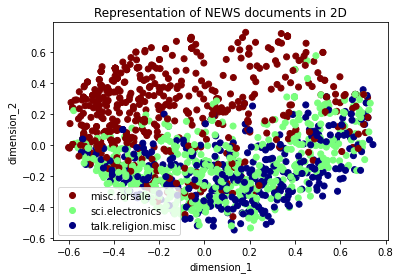

In [ ]:
# Now, we'll create a scatter plot using these principal components and represent each category with a separate color. 
scatter = plt.scatter(reduced_tfidf[:, 0], \
                      reduced_tfidf[:, 1], \
                      c=news_data_df['category'], cmap='jet_r')

plt.xlabel('dimension_1')

plt.ylabel('dimension_2')

plt.legend(handles=scatter.legend_elements()[0], \
           labels=categories, loc='lower left')

plt.title('Representation of NEWS documents in 2D')

plt.show()

From the preceding plot, we can see that a scatter plot has been created in which each category of article is represented by a different color. This plot shows another important use case of dimensionality reduction: visualization. We were able to plot this two-dimensional image because we had two principal components. With the earlier TFIDF matrix, we had 20 features, which is impossible to visualize. In this section, you learned how to perform dimensionality reduction to save memory space and visualize datasets.